In [0]:
# Learning links:

#  https://colab.research.google.com/drive/1CVm50PGE4vhtB5I_a_yc4h5F-itKOVL9#scrollTo=4Z8873a3oprU

#  https://pythonmachinelearning.pro/introduction-to-convolutional-neural-networks-for-vision-tasks/


#### Architecture
* **Convolutional #1** outputs 28x28x6
    * **Activation** any activation function, we will `relu`

* **Pooling #1** The output shape should be 14x14x6.

* **Convolutional #2** outputs 10x10x16.
    * **Activation** any activation function, we will `relu`

* **Pooling #2** outputs 5x5x16.
    * **Flatten** Flatten the output shape of the final pooling layer

* **Fully Connected #1** outputs 120
    * **Activation** any activation function, we will `relu`

* **Fully Connected #2** outputs 84
    * **Activation** any activation function, we will `relu`

* **Fully Connected (Logits) #3** outpute 10


### Download Using URL CODE:

In [0]:
from requests import get

def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)

In [0]:
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

### Importing the dataset from Keras itself:

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K

Using TensorFlow backend.


In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Displaying the image

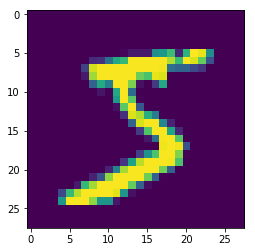

In [6]:
# Plotting the Image for understanding................
from matplotlib import pyplot as plt
plt.imshow(x_train[0], interpolation='nearest')
plt.show()

In [7]:
K.image_data_format()

'channels_last'

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

### Creating the channels, since it is grey scale, we are creating one channel

In [0]:
# Creating channels

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Padding in input dataset (28X28 to 32x32) since Lenet uses 32X32 as input

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [0]:
import numpy as np
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 32, 32, 1)
(60000,)
(10000, 32, 32, 1)
(10000,)


### Some preprocessing

In [13]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


In [14]:
# before vectorization
y_train[0]

5

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [17]:
# after vectorization
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Froming the LeNet Architecture

In [0]:
"""
# Orginal Code :

# Link : https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086

model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

"""

In [19]:
# Modified Code as per Lenet

model = keras.Sequential()

# Convolution #1. Input = 32x32x1. Output = 28x28x6 conv2d | (32-5+1 = 28), hence we shoud use 5X5 kernel 
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='sigmoid', input_shape=(32,32,1)))  

# SubSampling #1. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
model.add(AveragePooling2D())

# Convolution #2. Input = 14x14x6. Output = 10x10x16 conv2d
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid'))

# SubSampling #2. Input = 10x10x16. Output = 5x5x16 avg_pool
model.add(AveragePooling2D())

model.add(Flatten())

# Fully Connected #1. Input = 5x5x16. Output = 120
model.add(Dense(units=120, activation='sigmoid'))

# Fully Connected #2. Input = 120. Output = 84
model.add(Dense(units=84, activation='sigmoid'))

# Output 10
model.add(Dense(units=10, activation = 'softmax'))


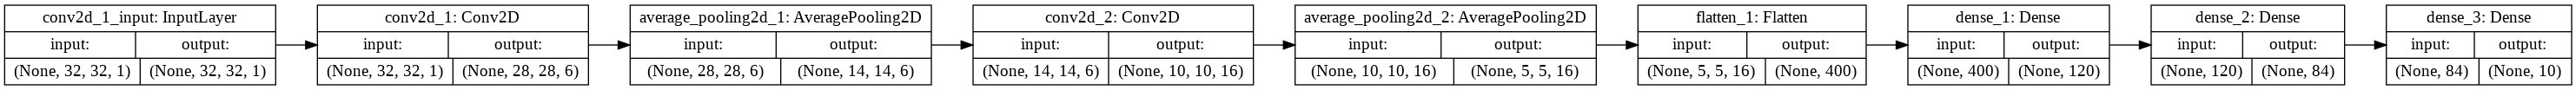

In [20]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, rankdir='LR', expand_nested=True)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

### Compiling the model

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

### Running the Model

In [24]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 12s 197us/step - loss: 1.4326 - acc: 0.5212 - val_loss: 0.4754 - val_acc: 0.8684
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3558 - acc: 0.8973 - val_loss: 0.2591 - val_acc: 0.9218
Epoch 3/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2358 - acc: 0.9283 - val_loss: 0.1881 - val_acc: 0.9432
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1792 - acc: 0.9448 - val_loss: 0.1523 - val_acc: 0.9560
Epoch 5/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1444 - acc: 0.9560 - val_loss: 0.1337 - val_acc: 0.9596
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1206 - acc: 0.9627 - val_loss: 0.1042 - val_acc: 0.9683
Epoch 7/10
60000/60000 [

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06950962834358215
Test accuracy: 0.9771


### Loss-Accuracy Graph

In [0]:
def loss_acc_graph(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.grid()
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.grid()
  plt.show()

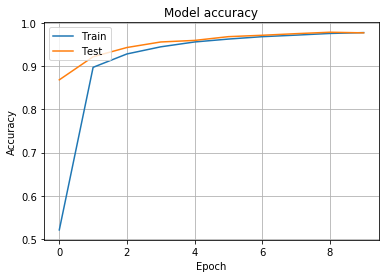

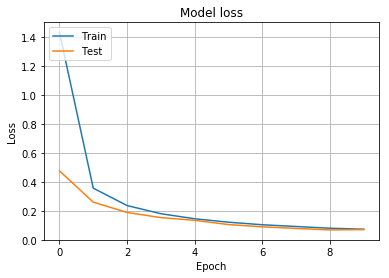

In [27]:
loss_acc_graph(history=history)

### Weight vectors Analayis

In [0]:
w_after = model.get_weights()

In [30]:
for x in range(len(w_after)):
  print("*"*120)
  print(type(w_after[x]))
  print(w_after[x].shape)

************************************************************************************************************************
<class 'numpy.ndarray'>
(5, 5, 1, 6)
************************************************************************************************************************
<class 'numpy.ndarray'>
(6,)
************************************************************************************************************************
<class 'numpy.ndarray'>
(5, 5, 6, 16)
************************************************************************************************************************
<class 'numpy.ndarray'>
(16,)
************************************************************************************************************************
<class 'numpy.ndarray'>
(400, 120)
************************************************************************************************************************
<class 'numpy.ndarray'>
(120,)
**************************************************************************

**(5, 5, 1, 6)** --> (5X5 Kernel) of total 6 layers + 1 channel

**(6,)** --> 6 bias term

**(5, 5, 6, 16)** --> (5X5 Kernel) of total 16 layers + 1 channel

**(16,)** --> 16 bias Term

**(400, 120)** --> 120 Fully connected layer activation (120 Sigmoid Activation)

**(120,)** --> 120 bias term

**(120, 84)** --> 120 fully connected Sigmoid to 84 Fully conneted Sigmoid

**(84,)** --> Bias

**(84, 10)** --> 80 fully connected Sigmoid to 10 Fully conneted Softmax (for 10 class classification)
